In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
df_tr=pd.read_csv('train_house.csv')
df_ts=pd.read_csv('test_house.csv')
print("Train",df_tr)
print("Test",df_ts)
pd.set_option('max_rows',10)

Train         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea Pool

In [4]:
df_tr.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_ts.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Data Analysis

# now we will check what are the data statistics

In [6]:
print('Data set Summary')
print('Rows :\n' ,len(df_tr))
print('Columns :\n', df_tr.shape[1])


Data set Summary
Rows :
 1460
Columns :
 81


In [7]:
print('\n Features :\n', df_ts.columns.tolist())
print('\n Missing values :\n', df_ts.isnull().sum().values.sum())
print('\n Unique values :\n', df_ts.nunique())


 Features :
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolA

# Train Null Values

<AxesSubplot:>

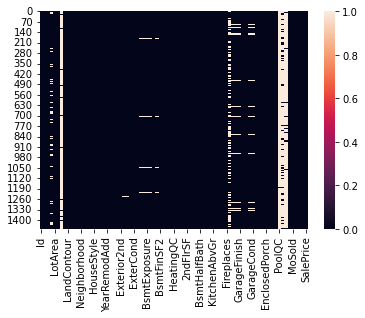

In [8]:
sns.heatmap(df_tr.isnull())

# train null list

In [9]:
nl=[]
nl=df_tr.isnull().sum()
nul=pd.DataFrame(nl.loc[nl !=0])
nul

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
...,...
GarageQual,81
GarageCond,81
PoolQC,1453
Fence,1179


# Numeric Nulls in Train

In [10]:
cols_tr = df_tr.columns
num_cols_tr = df_tr._get_numeric_data().columns
cat_cols_tr = list(set(cols_tr)-set(num_cols_tr))

<AxesSubplot:>

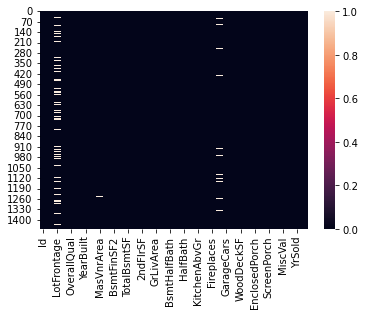

In [11]:
sns.heatmap(df_tr[num_cols_tr].isnull())

# Categorical Nulls in Train

<AxesSubplot:>

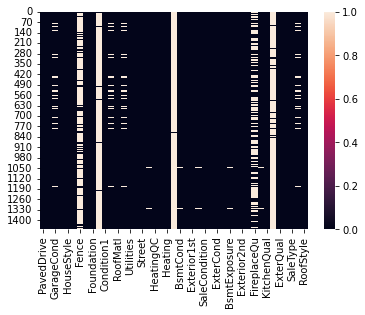

In [12]:
sns.heatmap(df_tr[cat_cols_tr].isnull())

# Data Cleaning

In [14]:
#dropping columns with many nulls
drop_col = ['FireplaceQu','PoolQC','Fence','MiscFeature','BsmtUnfSF']
df_tr.drop(drop_col, axis=1,inplace=True)
df_ts.drop(drop_col, axis=1,inplace=True)

In [15]:
cols=df_tr.columns
num_cols=df_tr._get_numeric_data().columns
cat_cols=list(set(cols)-set(num_cols))

In [17]:
fill_col=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'GarageType','GarageFinish','GarageCond']
for i in fill_col:
    print(i,"values :\n",df_tr[i].value_counts())
    print("________________________")

Alley values :
 Grvl    50
Pave    41
Name: Alley, dtype: int64
________________________
MasVnrType values :
 None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
________________________
BsmtQual values :
 TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
________________________
BsmtCond values :
 TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
________________________
BsmtExposure values :
 No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
________________________
BsmtFinType1 values :
 Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
________________________
BsmtFinType2 values :
 Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
________________________
GarageType values :
 Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: Garage

# Categorical Data

In [19]:
for i in cat_cols:
    print(i,"values :\n",df_tr[i].value_counts())
    print("__________________________")

PavedDrive values :
 Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
__________________________
MSZoning values :
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
__________________________
GarageCond values :
 TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
__________________________
Neighborhood values :
 NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
          ... 
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, Length: 25, dtype: int64
__________________________
HouseStyle values :
 1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
__________________________
LotShape values :
 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
__________________________
LandSlope values :
 Gtl    1382


# Filling No where Nan

In [20]:
for col in df_tr[fill_col]:
    df_tr[col]=df_tr[col].fillna('None')
for col in df_ts[fill_col]:
    df_ts[col]=df_ts[col].fillna('None')

In [21]:
colfil = ['BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars', 
            'GarageArea']
for col in colfil:
    df_ts[col].fillna(df_ts[col].median(),inplace = True)

In [22]:
num_col = df_tr._get_numeric_data().columns
cat_col = list(set(cols)-set(num_col))

In [23]:
df_tr['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:>

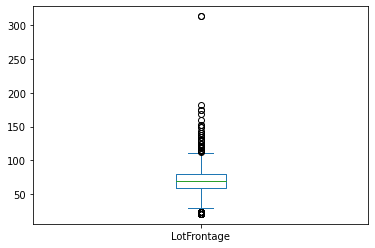

In [24]:
df_tr['LotFrontage'].plot.box()

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage'>

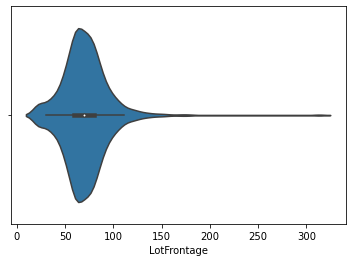

In [25]:
sns.violinplot(df_tr['LotFrontage'])

# Replace null with median

In [26]:
df_tr['LotFrontage'].fillna(value=df_tr['LotFrontage'].median(),inplace =True)
df_ts['LotFrontage'].fillna(value=df_ts['LotFrontage'].median(),inplace =True)

In [27]:
df_tr.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

<AxesSubplot:>

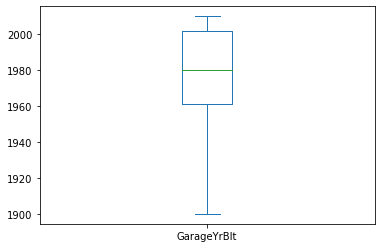

In [28]:
df_tr['GarageYrBlt'].plot.box()

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageYrBlt'>

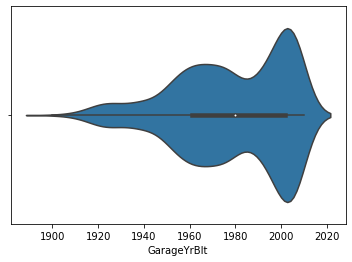

In [29]:
sns.violinplot(df_tr['GarageYrBlt'])

In [30]:
df_tr['GarageYrBlt'].fillna(value=df_tr['GarageYrBlt'].mean(),inplace =True)
df_ts['GarageYrBlt'].fillna(value=df_ts['GarageYrBlt'].mean(),inplace =True)

In [31]:
df_tr['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<AxesSubplot:>

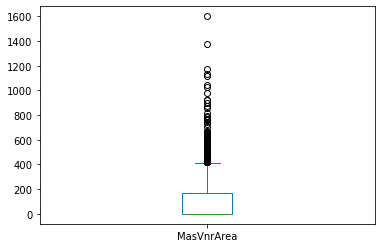

In [32]:
df_tr['MasVnrArea'].plot.box()

# Replacing Null with Median

In [36]:
df_tr['MasVnrArea'].fillna(value=df_tr['MasVnrArea'].median(),inplace =True)
df_ts['MasVnrArea'].fillna(value=df_ts['MasVnrArea'].median(),inplace =True)

# Sns heatmap

In [37]:
df_tr.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [38]:
df_tr.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchS

# Creating Some Features

In [39]:
both_col = [df_tr, df_ts]
for col in both_col:
    col['YrBltAndRemod'] = col['YearBuilt'] + col['YearRemodAdd']
    col['TotalSF'] = col['TotalBsmtSF'] + col['1stFlrSF'] + col['2ndFlrSF']
    col['Total_sqr_footage'] = (col['BsmtFinSF1'] + col['BsmtFinSF2'] +
                                 col['1stFlrSF'] + col['2ndFlrSF'])

    col['Total_Bathrooms'] = (col['FullBath'] + (0.5 * col['HalfBath']) +
                               col['BsmtFullBath'] + (0.5 *col['BsmtHalfBath']))

    col['Total_porch_sf'] = (col['OpenPorchSF'] + col['3SsnPorch'] +
                              col['EnclosedPorch'] + col['ScreenPorch'] +
                              col['WoodDeckSF'])

# Binary Features

In [40]:
both_col = [df_tr, df_ts]
for col in both_col:
    col['haspool'] = col['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    col['has2ndfloor'] = col['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    col['hasgarage'] = col['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    col['hasbsmt'] = col['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    col['hasfireplace'] = col['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

<AxesSubplot:>

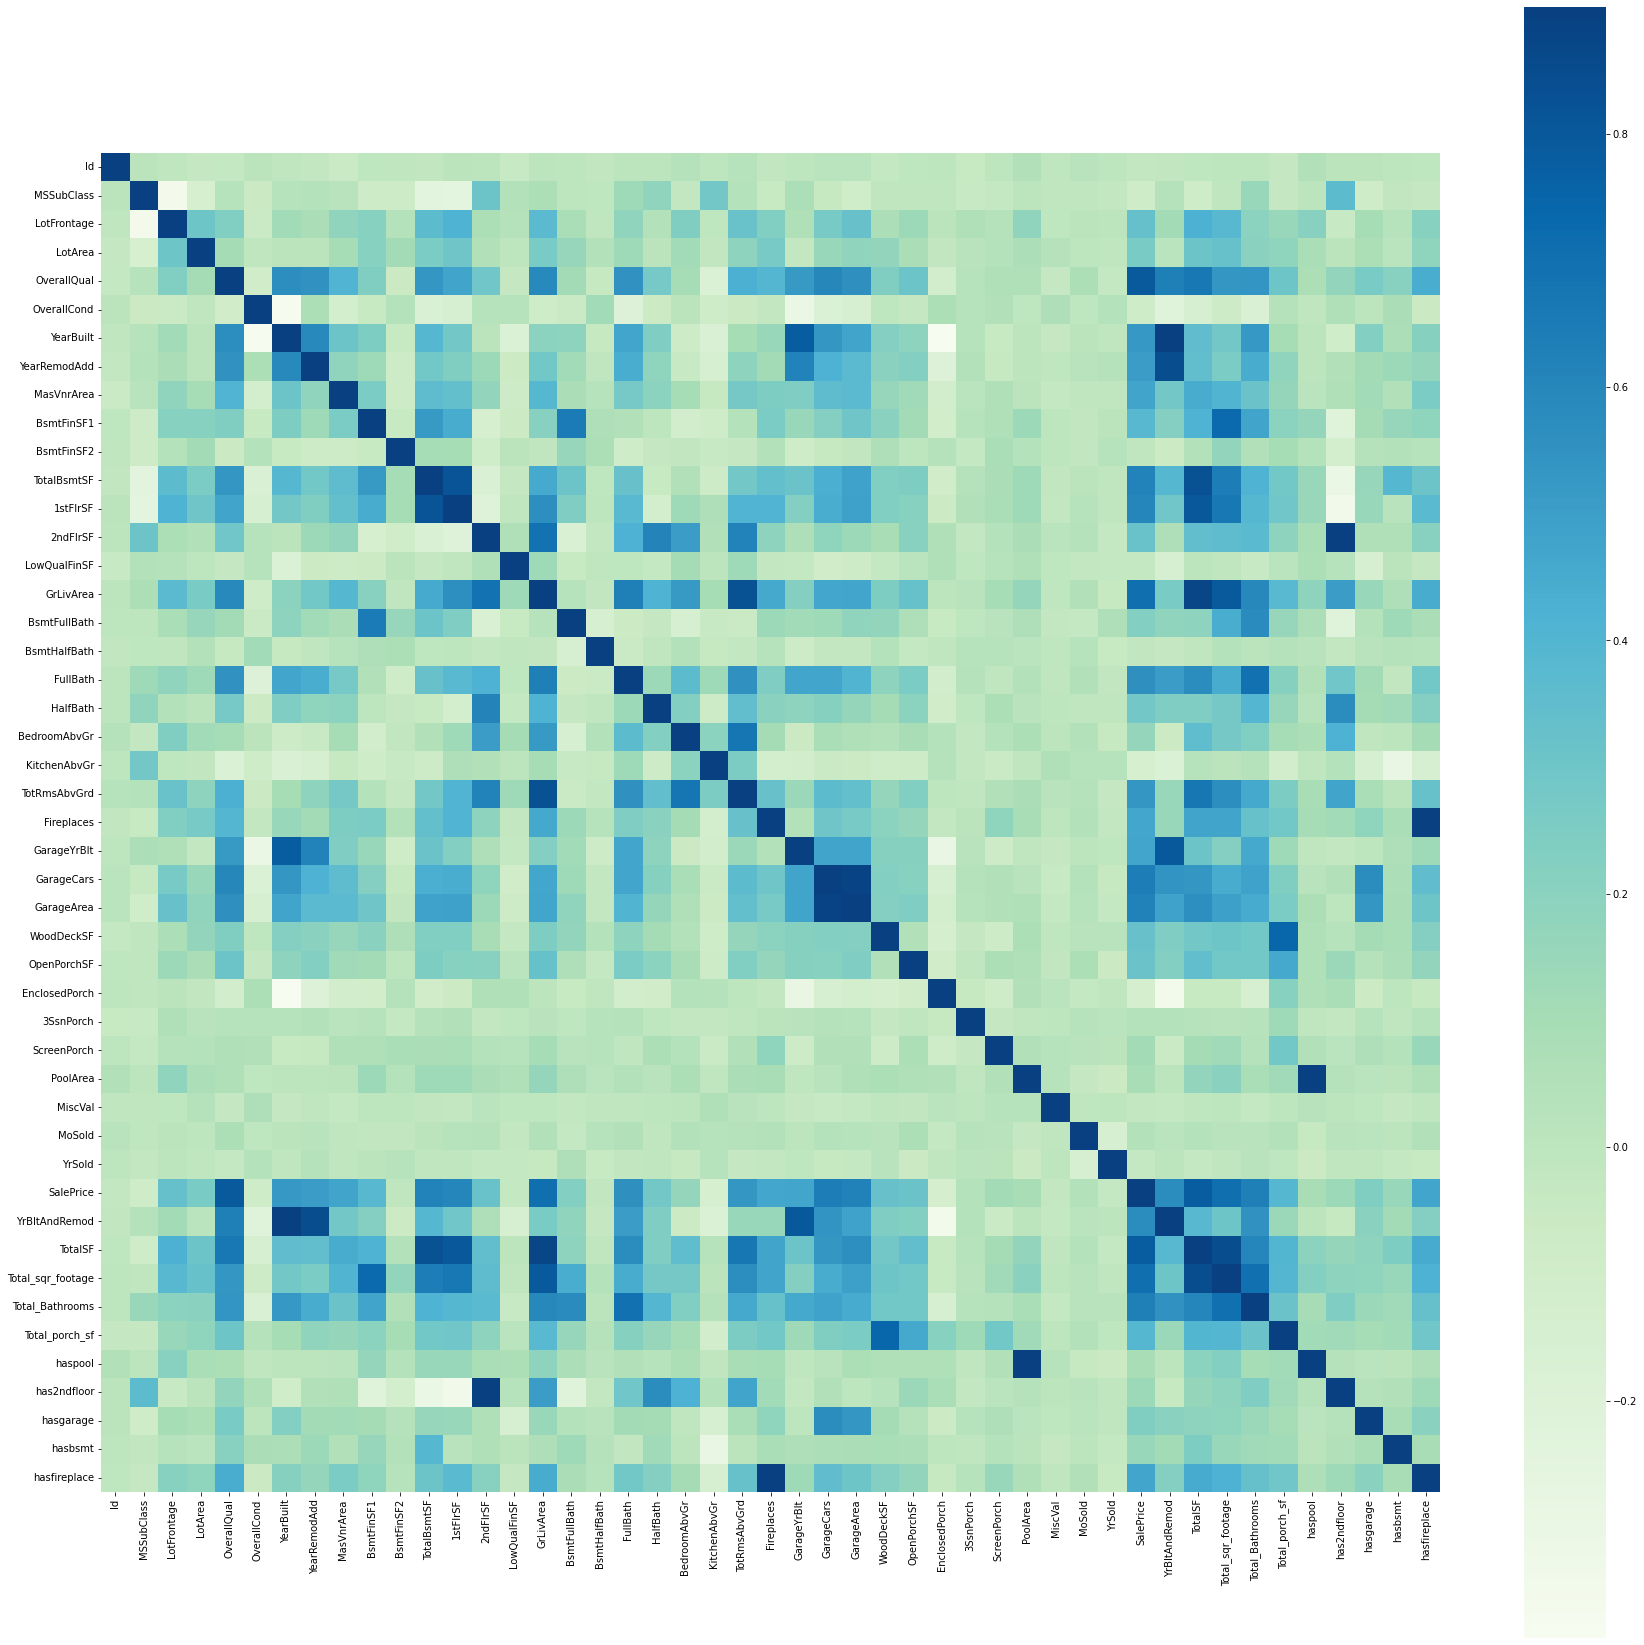

In [41]:
plt.subplots(figsize=(30,30))
sns.heatmap(df_tr.corr(),cmap="GnBu",vmax=0.9, square=True)

# Dropping Some Columns

In [42]:
drop_col = ['Exterior2nd','GarageYrBlt','Condition2','RoofMatl','Electrical','HouseStyle','Exterior1st',
            'Heating','GarageQual','Utilities','MSZoning','Functional','KitchenQual']
df_tr.drop(drop_col, axis = 1,inplace = True)
df_ts.drop(drop_col, axis = 1,inplace = True)

In [43]:
df_tr.drop(drop_col, axis = 1,inplace = True)
df_ts.drop(drop_col, axis = 1,inplace = True)

KeyError: "['Exterior2nd' 'GarageYrBlt' 'Condition2' 'RoofMatl' 'Electrical'\n 'HouseStyle' 'Exterior1st' 'Heating' 'GarageQual' 'Utilities' 'MSZoning'\n 'Functional' 'KitchenQual'] not found in axis"

In [44]:
df_tr

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,1,60,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,4006,2566,2416,3.5,61,0,1,1,1,0
1,2,20,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,3952,2524,2240,2.5,298,0,0,1,1,1
2,3,60,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,4003,2706,2272,3.5,42,0,1,1,1,1
3,4,70,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,3885,2473,1933,2.0,307,0,1,1,1,1
4,5,60,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,4000,3343,2853,3.5,276,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Pave,None,Reg,Lvl,Inside,Gtl,...,3999,2600,1647,2.5,40,0,1,1,1,1
1456,1457,20,85.0,13175,Pave,None,Reg,Lvl,Inside,Gtl,...,3966,3615,3026,3.0,349,0,0,1,1,1
1457,1458,70,66.0,9042,Pave,None,Reg,Lvl,Inside,Gtl,...,3947,3492,2615,2.0,60,0,1,1,1,1
1458,1459,20,68.0,9717,Pave,None,Reg,Lvl,Inside,Gtl,...,3946,2156,2156,2.0,478,0,0,1,1,0


In [45]:
df_ts

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,1461,20,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,...,3922,1778.0,1508.0,1.0,260,0,0,1,1,0
1,1462,20,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,...,3916,2658.0,2252.0,1.5,429,0,0,1,1,0
2,1463,60,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,...,3995,2557.0,2420.0,2.5,246,0,1,1,1,1
3,1464,60,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,...,3996,2530.0,2206.0,2.5,396,0,1,1,1,1
4,1465,120,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,...,3984,2560.0,1543.0,2.0,226,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,Pave,None,Reg,Lvl,Inside,Gtl,...,3940,1638.0,1092.0,1.5,0,0,1,0,1,0
1455,2916,160,21.0,1894,Pave,None,Reg,Lvl,Inside,Gtl,...,3940,1638.0,1344.0,1.5,24,0,1,1,1,0
1456,2917,20,160.0,20000,Pave,None,Reg,Lvl,Inside,Gtl,...,3956,2448.0,2448.0,2.0,474,0,0,1,1,1
1457,2918,85,62.0,10441,Pave,None,Reg,Lvl,Inside,Gtl,...,3984,1882.0,1307.0,1.5,112,0,0,0,1,0


In [46]:
cols = df_tr.columns
num_cols = df_tr._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

<AxesSubplot:>

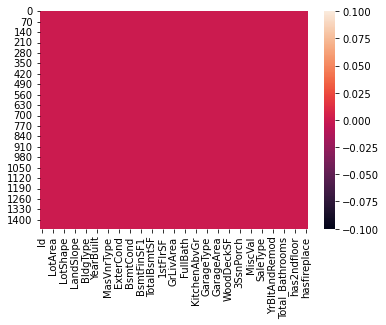

In [47]:
sns.heatmap(df_tr.isnull())

<AxesSubplot:>

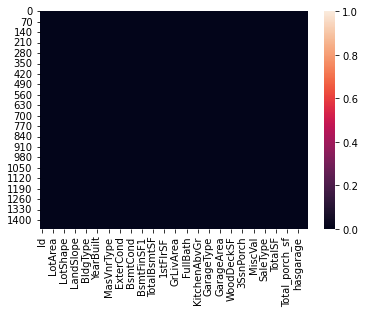

In [48]:
sns.heatmap(df_ts.isnull())

# Excluding NUII Values

In [49]:
df_ts[cat_cols]

,PavedDrive,GarageCond,Neighborhood,LotShape,LandSlope,Condition1,Foundation,GarageFinish,MasVnrType,Street,...,ExterCond,BsmtExposure,BldgType,BsmtFinType2,Alley,ExterQual,LandContour,SaleType,GarageType,RoofStyle
0,Y,TA,NAmes,Reg,Gtl,Feedr,CBlock,Unf,None,Pave,...,TA,No,1Fam,LwQ,None,TA,Lvl,WD,Attchd,Gable
1,Y,TA,NAmes,IR1,Gtl,Norm,CBlock,Unf,BrkFace,Pave,...,TA,No,1Fam,Unf,None,TA,Lvl,WD,Attchd,Hip
2,Y,TA,Gilbert,IR1,Gtl,Norm,PConc,Fin,None,Pave,...,TA,No,1Fam,Unf,None,TA,Lvl,WD,Attchd,Gable
3,Y,TA,Gilbert,IR1,Gtl,Norm,PConc,Fin,BrkFace,Pave,...,TA,No,1Fam,Unf,None,TA,Lvl,WD,Attchd,Gable
4,Y,TA,StoneBr,IR1,Gtl,Norm,PConc,RFn,None,Pave,...,TA,No,TwnhsE,Unf,None,Gd,HLS,WD,Attchd,Gable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Y,None,MeadowV,Reg,Gtl,Norm,CBlock,None,None,Pave,...,TA,No,Twnhs,Unf,None,TA,Lvl,WD,None,Gable
1455,Y,TA,MeadowV,Reg,Gtl,Norm,CBlock,Unf,None,Pave,...,TA,No,TwnhsE,Unf,None,TA,Lvl,WD,CarPort,Gable
1456,Y,TA,Mitchel,Reg,Gtl,Norm,CBlock,Unf,None,Pave,...,TA,No,1Fam,Unf,None,TA,Lvl,WD,Detchd,Gable
1457,Y,None,Mitchel,Reg,Gtl,Norm,PConc,None,None,Pave,...,TA,Av,1Fam,Unf,None,TA,Lvl,WD,None,Gable


In [50]:
df_tr[cat_cols]

,PavedDrive,GarageCond,Neighborhood,LotShape,LandSlope,Condition1,Foundation,GarageFinish,MasVnrType,Street,...,ExterCond,BsmtExposure,BldgType,BsmtFinType2,Alley,ExterQual,LandContour,SaleType,GarageType,RoofStyle
0,Y,TA,CollgCr,Reg,Gtl,Norm,PConc,RFn,BrkFace,Pave,...,TA,No,1Fam,Unf,None,Gd,Lvl,WD,Attchd,Gable
1,Y,TA,Veenker,Reg,Gtl,Feedr,CBlock,RFn,None,Pave,...,TA,Gd,1Fam,Unf,None,TA,Lvl,WD,Attchd,Gable
2,Y,TA,CollgCr,IR1,Gtl,Norm,PConc,RFn,BrkFace,Pave,...,TA,Mn,1Fam,Unf,None,Gd,Lvl,WD,Attchd,Gable
3,Y,TA,Crawfor,IR1,Gtl,Norm,BrkTil,Unf,None,Pave,...,TA,No,1Fam,Unf,None,TA,Lvl,WD,Detchd,Gable
4,Y,TA,NoRidge,IR1,Gtl,Norm,PConc,RFn,BrkFace,Pave,...,TA,Av,1Fam,Unf,None,Gd,Lvl,WD,Attchd,Gable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Y,TA,Gilbert,Reg,Gtl,Norm,PConc,RFn,None,Pave,...,TA,No,1Fam,Unf,None,TA,Lvl,WD,Attchd,Gable
1456,Y,TA,NWAmes,Reg,Gtl,Norm,CBlock,Unf,Stone,Pave,...,TA,No,1Fam,Rec,None,TA,Lvl,WD,Attchd,Gable
1457,Y,TA,Crawfor,Reg,Gtl,Norm,Stone,RFn,None,Pave,...,Gd,No,1Fam,Unf,None,Ex,Lvl,WD,Attchd,Gable
1458,Y,TA,NAmes,Reg,Gtl,Norm,CBlock,Unf,None,Pave,...,TA,Mn,1Fam,Rec,None,TA,Lvl,WD,Attchd,Hip


# Value Counts in Categorical Data

In [51]:
for i in df_tr[cat_cols]:
    print(i,":",len(df_tr[i].unique()))

PavedDrive : 3
GarageCond : 6
Neighborhood : 25
LotShape : 4
LandSlope : 3
Condition1 : 9
Foundation : 6
GarageFinish : 4
MasVnrType : 4
Street : 2
BsmtFinType1 : 7
HeatingQC : 5
BsmtCond : 5
LotConfig : 5
BsmtQual : 5
SaleCondition : 6
CentralAir : 2
ExterCond : 5
BsmtExposure : 5
BldgType : 5
BsmtFinType2 : 7
Alley : 3
ExterQual : 4
LandContour : 4
SaleType : 9
GarageType : 7
RoofStyle : 6


# Value counts in Test

In [52]:
for i in df_ts[cat_cols]:
    print(i,":",len(df_ts[i].unique()))

PavedDrive : 3
GarageCond : 6
Neighborhood : 25
LotShape : 4
LandSlope : 3
Condition1 : 9
Foundation : 6
GarageFinish : 4
MasVnrType : 4
Street : 2
BsmtFinType1 : 7
HeatingQC : 5
BsmtCond : 5
LotConfig : 5
BsmtQual : 5
SaleCondition : 6
CentralAir : 2
ExterCond : 5
BsmtExposure : 5
BldgType : 5
BsmtFinType2 : 7
Alley : 3
ExterQual : 4
LandContour : 4
SaleType : 10
GarageType : 7
RoofStyle : 6


# Label Encoding of Data

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
dftr = df_tr[cat_cols].apply(LabelEncoder().fit_transform)

In [55]:
dfts = df_ts[cat_cols].apply(LabelEncoder().fit_transform)

In [56]:
df_tr_final = df_tr[num_cols].join(dftr)

In [57]:
num_cols = df_ts._get_numeric_data().columns
df_ts_final = df_ts[num_cols].join(dfts)

In [58]:
df_tr_final

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ExterCond,BsmtExposure,BldgType,BsmtFinType2,Alley,ExterQual,LandContour,SaleType,GarageType,RoofStyle
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,4,3,0,6,1,2,3,8,1,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,4,1,0,6,1,3,3,8,1,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,4,2,0,6,1,2,3,8,1,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,4,3,0,6,1,3,3,8,5,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,4,0,0,6,1,2,3,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,4,3,0,6,1,3,3,8,1,1
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,4,3,0,5,1,3,3,8,1,1
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,2,3,0,6,1,0,3,8,1,1
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,4,2,0,5,1,3,3,8,1,3


In [59]:
df_ts_final

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ExterCond,BsmtExposure,BldgType,BsmtFinType2,Alley,ExterQual,LandContour,SaleType,GarageType,RoofStyle
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,4,3,0,3,1,3,3,8,1,1
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,4,3,0,6,1,3,3,8,1,3
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,4,3,0,6,1,3,3,8,1,1
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,4,3,0,6,1,3,3,8,1,1
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,4,3,4,6,1,2,1,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,4,3,3,6,1,3,3,8,6,1
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,4,3,4,6,1,3,3,8,4,1
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,4,3,0,6,1,3,3,8,5,1
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,4,0,0,6,1,3,3,8,6,1


In [60]:
ids = df_ts['Id']
df_tr_final.drop('Id',axis=1,inplace=True)
df_ts_final.drop('Id',axis=1,inplace=True)

# Analysis Part is Over now we continue with building of model

# Applying Linear Regression Model

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import statsmodels.api as sm

In [62]:
for i in df_tr_final.columns:
    X = df_tr_final[[i]]#.values.reshape(1,-1)
    y = df_tr_final[['SalePrice']]#.values.reshape(1,-1)

    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=101)
    LR = LinearRegression()
    LR.fit(X_train,y_train)
    y_pred = LR.predict(X_test)
    print(i,"gives R2 score",r2_score(y_pred,y_test))
    print(i,'gives MSE is:',mean_squared_error(y_test, y_pred))
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    print(i,'gives RMSE is:',rms)
    print("------------------------------------------")

MSSubClass gives R2 score -140.7809083832305
MSSubClass gives MSE is: 6263558050.411938
MSSubClass gives RMSE is: 79142.64369107175
------------------------------------------
LotFrontage gives R2 score -6.313508809537988
LotFrontage gives MSE is: 5679310308.255192
LotFrontage gives RMSE is: 75361.19895712376
------------------------------------------
LotArea gives R2 score -2.13343687958405
LotArea gives MSE is: 6523632090.666056
LotArea gives RMSE is: 80769.00451699313
------------------------------------------
OverallQual gives R2 score 0.39569577944668155
OverallQual gives MSE is: 2546734982.61452
OverallQual gives RMSE is: 50465.18584741881
------------------------------------------
OverallCond gives R2 score -76.23321297964024
OverallCond gives MSE is: 6410866135.784961
OverallCond gives RMSE is: 80067.884546708
------------------------------------------
YearBuilt gives R2 score -1.3650408096780824
YearBuilt gives MSE is: 5018954058.046522
YearBuilt gives RMSE is: 70844.5767723015

In [63]:
#print('Coefficient is',LR.coef_[0][0])
#print('intercept is',LR.intercept_[0])

# Multiple Regression using Random Forest Algorithum

In [64]:
X = df_tr_final.drop('SalePrice',axis=1)#.values.reshape(1,-1)
y = df_tr_final['SalePrice']#.values.reshape(1,-1)

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=101)

# Input Features we want to train model with

In [65]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#X_train1 = scaler.fit_transform(X_train)
#y_train1 = scaler.fit_transform(y_train)
rfe = RFE(LR, 10)
rfe.fit(X_train,y_train)

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LinearRegression(), n_features_to_select=10)

In [66]:
#rfe support
X_train.columns[rfe.support_]

Index(['OverallQual', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'Total_Bathrooms', 'haspool', 'hasgarage', 'hasfireplace', 'Street',
       'ExterQual'],
      dtype='object')

In [67]:
cols = X_train.columns[rfe.support_]

In [68]:
LR.fit(X_train[cols],y_train)

LinearRegression()

In [69]:
y_pred = LR.predict(X_test[cols])
print("gives R2 score",r2_score(y_pred,y_test))
print('gives MSE is:',mean_squared_error(y_test, y_pred))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print('gives RMSE is:',rms)
print("-----------------------------")

gives R2 score 0.6222176122058247
gives MSE is: 1825477789.833047
gives RMSE is: 42725.6104676463
-----------------------------


In [70]:
y_pred = LR.predict(df_ts_final[cols])

In [71]:
#For creating Output CSV file
def makecsv(y_pred,subno): ### input file name in ""
    subdf = pd.DataFrame()
    subdf['Id'] = df_ts['Id']
    subdf['SalePrice'] = y_pred
    subdf.to_csv(subno, index=False)

# Make Csv for result

In [72]:
# makecsv(y_pred,"rfesol.csv")
import scipy.stats as stats
stats.ttest_1samp(a=df_tr['OverallQual'],popmean=df_tr['SalePrice'].mean())

Ttest_1sampResult(statistic=-4998390.017798861, pvalue=0.0)

In [73]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              859.7
Date:                Fri, 17 Dec 2021   Prob (F-statistic):                        0.00
Time:                        14:28:56   Log-Likelihood:                         -17163.
No. Observations:                1460   AIC:                                  3.446e+04
Df Residuals:                    1395   BIC:                                  3.480e+04
Df Model:                          65                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# Model Using All Features

In [74]:
X = df_tr_final.drop('SalePrice',axis=1)#.values.reshape(1,-1)
y = df_tr_final['SalePrice']#.values.reshape(1,-1)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=101)

In [75]:
### For using rfe selected features
#X_train = X_train[cols]
#X_test = X_test[cols]

# Multiple Regression Model

In [76]:
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print("Multiple Linear regression gives R2 score",r2_score(y_pred,y_test))
print('Multiple Linear regression gives MSE is:',mean_squared_error(y_test, y_pred))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print('Multiple Linear regression gives RMSE is:',rms)
print("-------------------------------------------")

Multiple Linear regression gives R2 score 0.7014895629589626
Multiple Linear regression gives MSE is: 1897678359.2161577
Multiple Linear regression gives RMSE is: 43562.35024899549
-------------------------------------------


# Testing on Test Data

In [77]:
y_pred = LR.predict(df_ts_final)

# Make CSV For Result

In [78]:
#makecsv(y_pred,"MLsol.csv")


# Random Forest Algorithm

In [79]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 300, random_state = 0)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [80]:
y_pred = rf.predict(X_test)

In [81]:
print('all gives R2 score',r2_score(y_pred,y_test))
print('all gives MSE is:',mean_squared_error(y_test, y_pred))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print('all gives RMSE is:',rms)
print("-----------------------------------------")

all gives R2 score 0.8236609896932132
all gives MSE is: 875467031.1030096
all gives RMSE is: 29588.29212886424
-----------------------------------------


# Testing on Test Data

In [82]:
y_pred = rf.predict(df_ts_final)

In [ ]:
#make Csv for result
#makecsv(y_pred,"Rfsol.csv")